In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install --upgrade tensorflow
!pip install keras==2.15.0
!pip install --upgrade tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 110.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 94.5 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.14.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.14.0
    Uninstalling tensorflow-2.14.0:
      Successfull

In [ ]:
!pip uninstall tensorflow
!pip install tensorflow


Found existing installation: tensorflow 2.15.0.post1
Uninstalling tensorflow-2.15.0.post1:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.15.0.post1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? Y
  Successfully uninstalled tensorflow-2.15.0.post1
  Using cached tensorflow-2.15.0.post1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (475.2 MB)


In [ ]:
from keras.layers import Input, Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import DenseNet121
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Input, GlobalAveragePooling2D, Flatten, BatchNormalization, Dense, Dropout
from keras.models import Model
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
import PIL
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,TensorBoard
import time
import cv2
import glob
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from keras.models import load_model
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve, auc
from keras.layers import concatenate

In [ ]:
# Specify the path to your data in Google Drive
base_path = '/content/drive/MyDrive/chest_xray new data'




#**2) Loading Data**

In [ ]:
# Update the paths accordingly
train_data = glob.glob(os.path.join(base_path, 'train/**/*.jpeg'))
test_data = glob.glob(os.path.join(base_path, 'test/**/*.jpeg'))
val_data = glob.glob(os.path.join(base_path, 'val/**/*.jpeg'))

print(f"Training Set has: {len(train_data)} images")
print(f"Testing Set has: {len(test_data)} images")
print(f"Validation Set has: {len(val_data)} images")

Training Set has: 1644 images
Testing Set has: 624 images
Validation Set has: 16 images


In [ ]:
def plot_multiple_img(img_matrix_list, title_list, ncols, main_title=""):
    # Set up the figure and axes for subplots
    fig, myaxes = plt.subplots(figsize=(20, 15), nrows=(len(img_matrix_list) // ncols) + 1, ncols=ncols, squeeze=False)

    # Adjust layout
    fig.suptitle(main_title, fontsize=30)
    fig.subplots_adjust(wspace=0.3)
    fig.subplots_adjust(hspace=0.3)

    # Enumerate through the images and titles
    for i, (img, title) in enumerate(zip(img_matrix_list, title_list)):
        row = i // ncols
        col = i % ncols
        myaxes[row, col].imshow(img)
        myaxes[row, col].set_title(title, fontsize=15)

    # Remove empty subplots if any
    for i in range(len(img_matrix_list), len(myaxes.flatten())):
        fig.delaxes(myaxes.flatten()[i])

    plt.show()

#**3) Data Distribution**

In [ ]:
sets = ["train", "test", "val"]
all_pneumonia = []
all_normal = []

for cat in sets:
    path = os.path.join(base_path, cat)
    norm = glob.glob(os.path.join(path, "NORMAL/*.jpeg"))
    pneu = glob.glob(os.path.join(path, "PNEUMONIA/*.jpeg"))
    all_normal.extend(norm)
    all_pneumonia.extend(pneu)

print(f"Total Pneumonia Images: {len(all_pneumonia)}")
print(f"Total Normal Images: {len(all_normal)}")

Total Pneumonia Images: 1496
Total Normal Images: 788


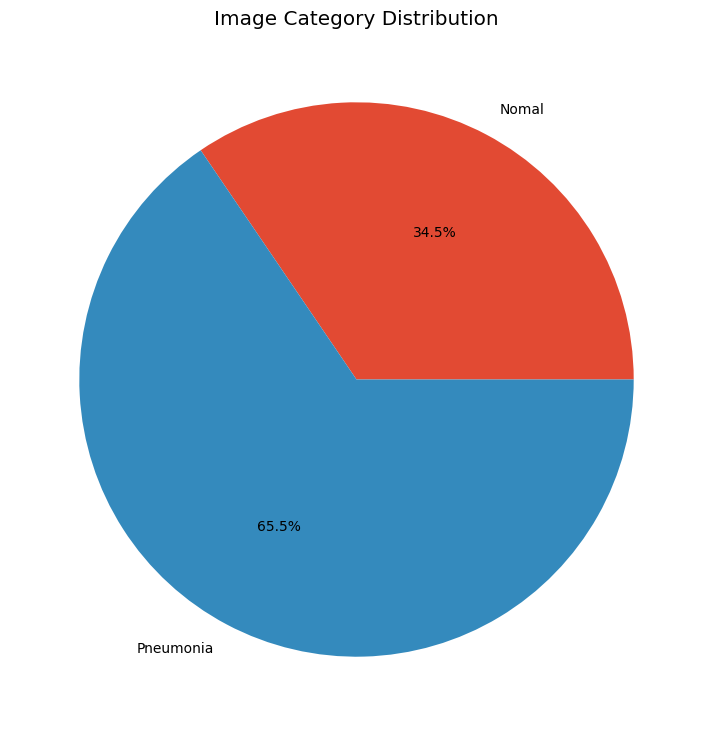

In [ ]:
labels = ['Nomal', 'Pneumonia']
targets = [len(all_normal), len(all_pneumonia)]

plt.style.use("ggplot")
plt.figure(figsize=(16, 9))
plt.pie(x=targets, labels=labels, autopct="%1.1f%%")
plt.title("Image Category Distribution")
plt.show()

#**4) EDA**

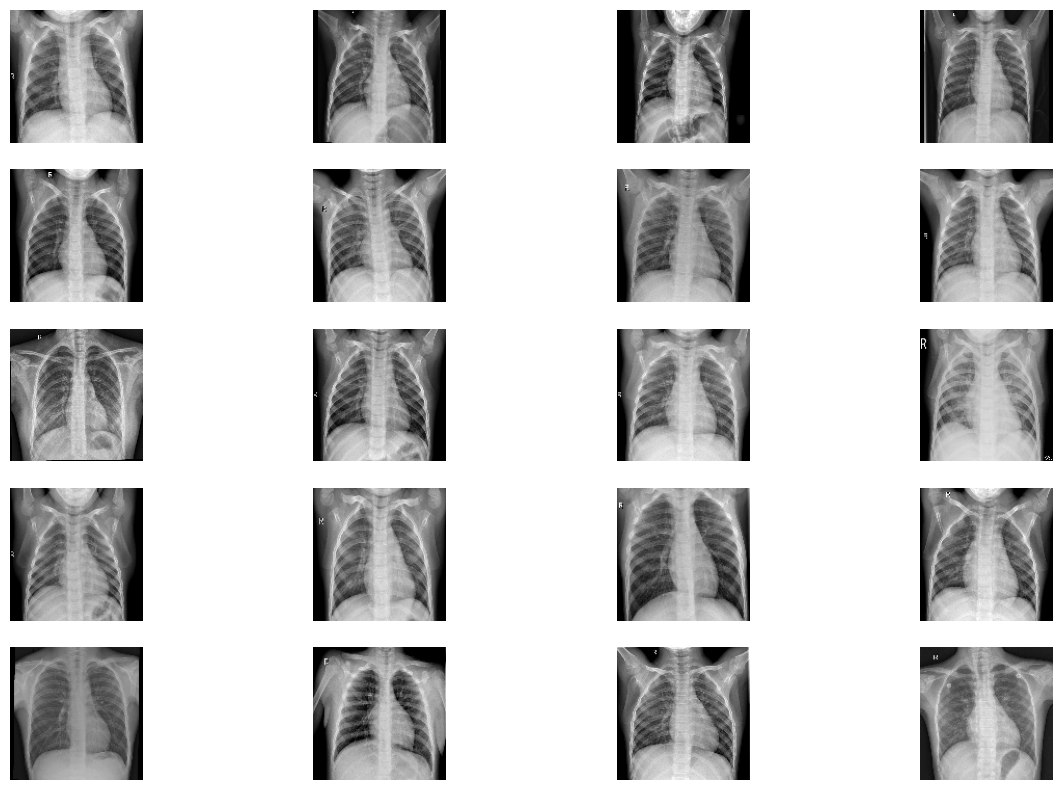

In [ ]:
# Shuffle the images randomly
random.shuffle(all_normal)
random.shuffle(all_pneumonia)

# Select a subset of images for visualization
images = all_normal[:50] + all_pneumonia[:50]

# Viewing the images in X-ray
fig = plt.figure(figsize=(15, 10))
columns = 4
rows = 5

for i in range(1, columns * rows + 1):
    img_path = images[i]
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128))

    fig.add_subplot(rows, columns, i)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for proper display
    plt.axis(False)

plt.show()

**Now let’s try Ben Graham’s method. First, we convert the images to greyscale and then apply Gaussian blur to them.**

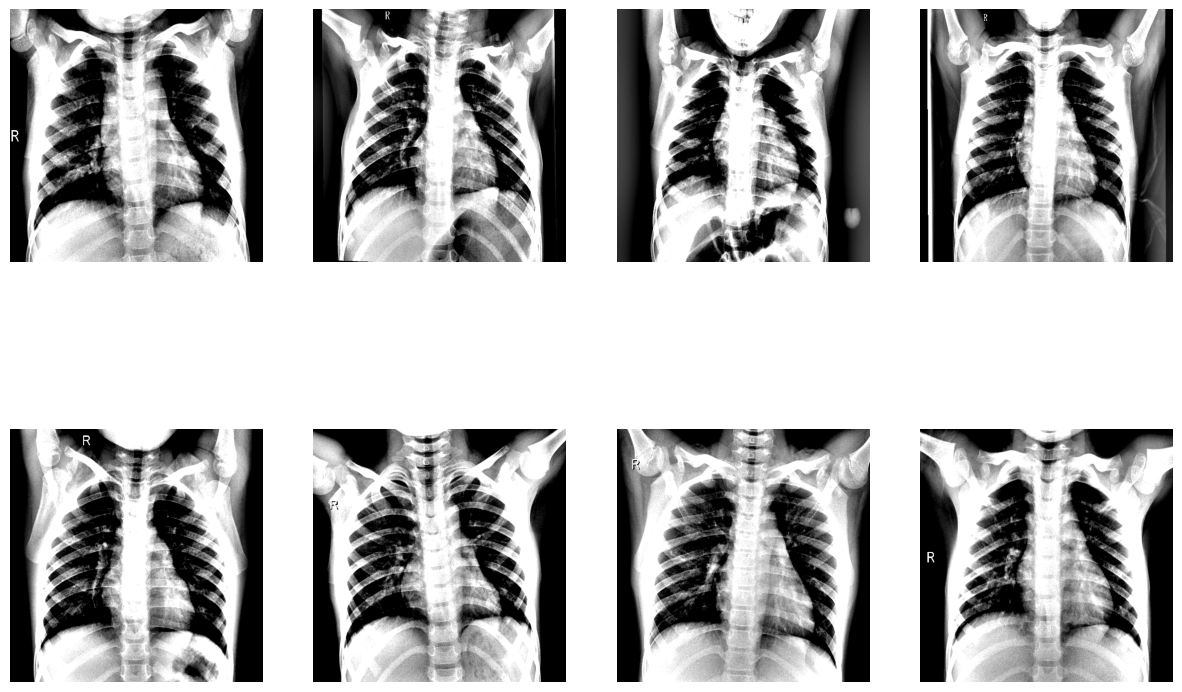

In [ ]:
fig = plt.figure(figsize=(15, 10))
columns = 4
rows = 2

for i in range(1, columns * rows + 1):
    img_path = images[i]
    img = cv2.imread(img_path)
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    img = cv2.addWeighted(img, 4, cv2.GaussianBlur(img, (0, 0), 512 / 10), -4, 128)

    fig.add_subplot(rows, columns, i)

    plt.imshow(img, cmap='gray')  # Display the grayscale image
    plt.axis(False)

plt.show()

**Now, let’s look into the pixel distributions. We’ll use the Fourier method for this.**

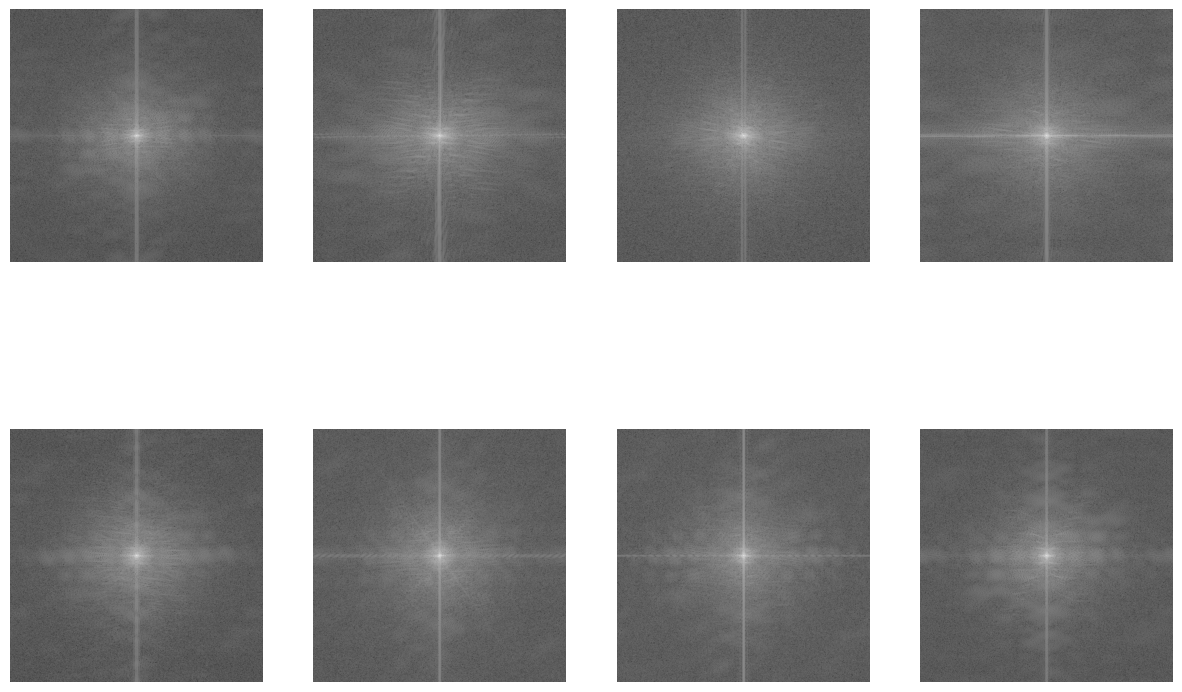

In [ ]:
# Analyzing pixel distributions using Fourier method
fig = plt.figure(figsize=(15, 10))
columns = 4
rows = 2

for i in range(1, columns * rows + 1):
    img_path = images[i]
    img = cv2.imread(img_path)
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))

    fig.add_subplot(rows, columns, i)

    plt.imshow(magnitude_spectrum, cmap='gray')  # Display the magnitude spectrum
    plt.axis(False)

plt.show()

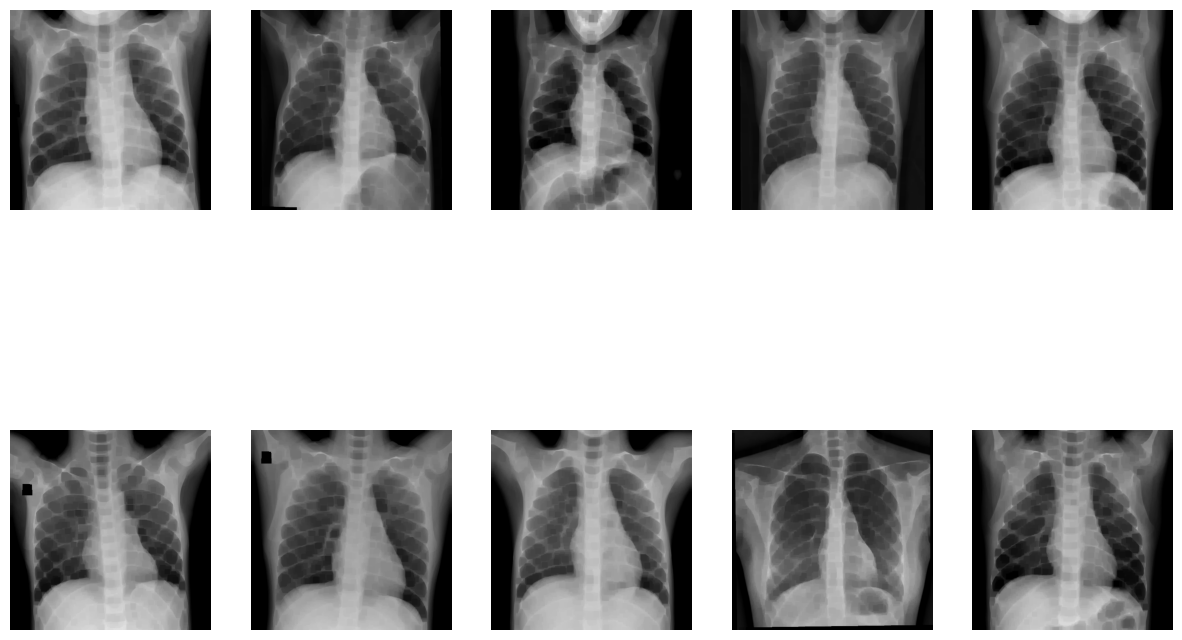

In [ ]:
# Applying image erosion
fig = plt.figure(figsize=(15, 10))
columns = 5
rows = 2

for i in range(1, columns * rows + 1):
    img_path = images[i]
    img = cv2.imread(img_path)
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    kernel = np.ones((5, 5), np.uint8)
    img_erosion = cv2.erode(img, kernel, iterations=3)

    fig.add_subplot(rows, columns, i)

    plt.imshow(img_erosion)
    plt.axis(False)

plt.show()

#**dilation**

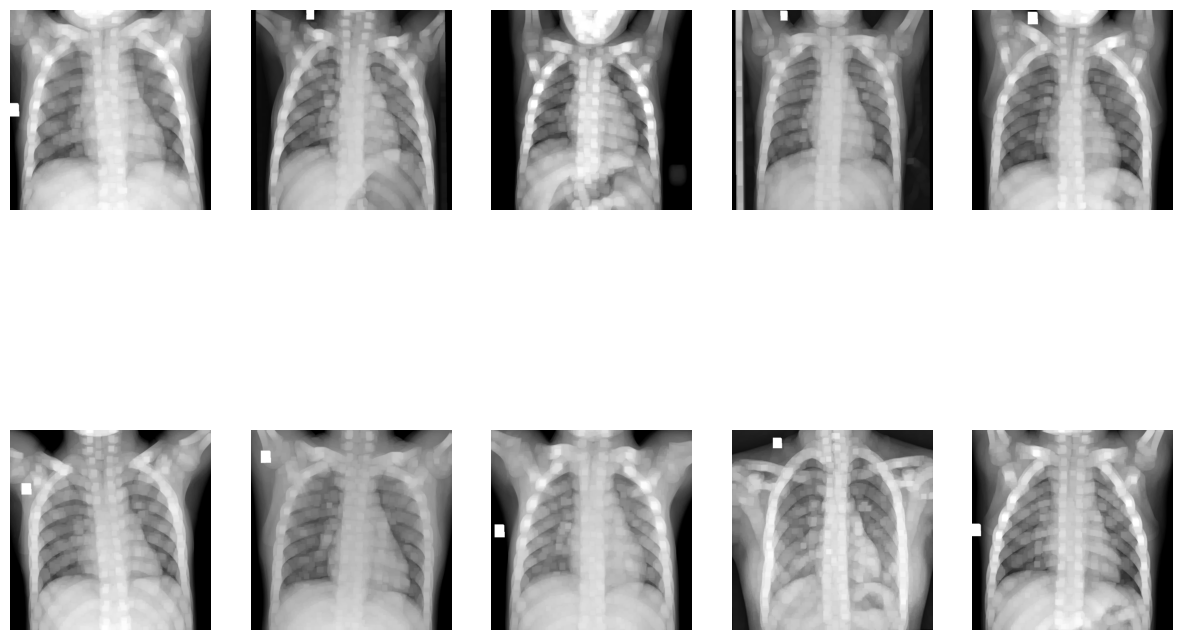

In [ ]:
# Applying image dilation
fig = plt.figure(figsize=(15, 10))
columns = 5
rows = 2

for i in range(1, columns * rows + 1):
    img_path = images[i]
    img = cv2.imread(img_path)
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    kernel = np.ones((5, 5), np.uint8)
    img_dilation = cv2.dilate(img, kernel, iterations=3)

    fig.add_subplot(rows, columns, i)

    plt.imshow(img_dilation)
    plt.axis(False)

plt.show()

In [ ]:
# Define custom preprocessing function
def preprocess_image(img):
    # Convert to single-channel (grayscale)
    original_image = img[:, :, 0].astype(np.uint8)  # Ensure that it's of type uint8

    # Find maximum and minimum intensity
    min_intensity = np.min(original_image)
    max_intensity = np.max(original_image)

    # Apply binary thresholding
    _, thresholded_image = cv2.threshold(original_image, (max_intensity + min_intensity) / 2, 255, cv2.THRESH_BINARY)

    # Apply morphologic closing
    kernel = np.ones((5, 5), np.uint8)
    closed_image = cv2.morphologyEx(thresholded_image, cv2.MORPH_CLOSE, kernel)

    # Create adaptive mask
    adaptive_mask = cv2.bitwise_not(closed_image)

    # Apply bitwise operation to remove diaphragm
    masked_image = cv2.bitwise_and(original_image, original_image, mask=adaptive_mask)

    # Apply histogram equalization
    equalized_image = cv2.equalizeHist(masked_image)

    # Apply Gaussian blur
    final_preprocessed_image = cv2.GaussianBlur(equalized_image, (5, 5), 0)

    # Replicate single channel to create a grayscale image
    final_preprocessed_image_rgb = np.stack([final_preprocessed_image] * 3, axis=-1)

    return final_preprocessed_image_rgb.astype(np.float32) / 255.0





#**OpenCV’s Canny Edge Detection:**

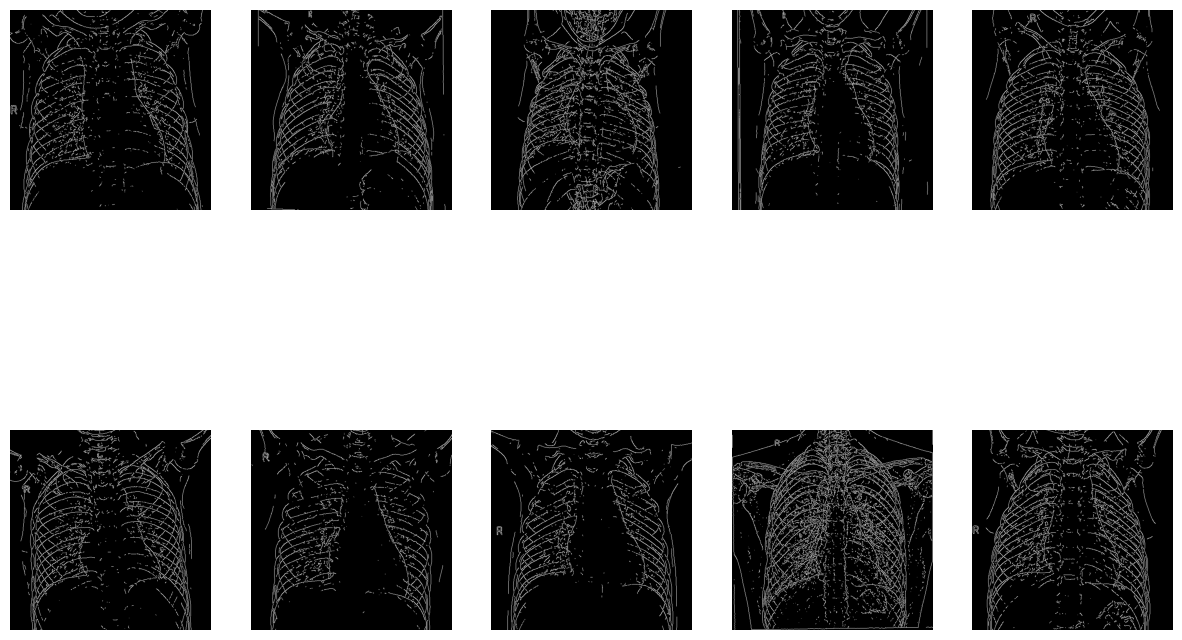

In [ ]:
# Applying Canny Edge Detection
fig = plt.figure(figsize=(15, 10))
columns = 5
rows = 2

for i in range(1, columns * rows + 1):
    img_path = images[i]
    img = cv2.imread(img_path)
    img = cv2.resize(img, (512, 512))
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    edges = cv2.Canny(img_gray, 80, 100)

    fig.add_subplot(rows, columns, i)

    plt.imshow(edges, cmap='gray')  # Display the edges in grayscale
    plt.axis(False)

plt.show()

#**5) Model Building**

In [ ]:
# Define ImageDataGenerators for training and validation
train_gen = ImageDataGenerator(
    rescale=1/255.,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=0.2,
    zoom_range=0.2
)

val_gen = ImageDataGenerator(
    rescale=1/255.,
)

# Flowing the data in the Data Generator
Train = train_gen.flow_from_directory(
    os.path.join(base_path, 'train'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Test = val_gen.flow_from_directory(
    os.path.join(base_path, 'test'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 1644 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


#**VGG16**

In [ ]:
# Image dimensions
img_width, img_height = 224, 224

In [ ]:
#Import VGG16 with pre-trained weights
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze existing weights
for layer in vgg.layers:
    layer.trainable = False

# Add custom fully connected layers for binary classification
model_vgg = Sequential([
    vgg,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Define callbacks
checkpoint_path = '/content/drive/MyDrive/model_checkpoint/vgg16.h5'
checkpoint = ModelCheckpoint(filepath=checkpoint_path, mode='auto', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=3)


# Compile the model

model_vgg.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


# Train the model
r = model_vgg.fit(
    Train,
    validation_data=Test,
    epochs=10,
    callbacks=[checkpoint, early_stopping])

58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/10
52/52 [==============================] - ETA: 0s - loss: 0.2990 - accuracy: 0.8954 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


52/52 [==============================] - 927s 18s/step - loss: 0.2990 - accuracy: 0.8954 - val_loss: 0.2595 - val_accuracy: 0.8942
Epoch 2/10
52/52 [==============================] - 802s 15s/step - loss: 0.1074 - accuracy: 0.9580 - val_loss: 0.4310 - val_accuracy: 0.8558
Epoch 3/10
52/52 [==============================] - 808s 16s/step - loss: 0.1065 - accuracy: 0.9599 - val_loss: 0.3704 - val_accuracy: 0.8766
Epoch 4/10
52/52 [==============================] - 850s 16s/step - loss: 0.0935 - accuracy: 0.9659 - val_loss: 0.3183 - val_accuracy: 0.8942


In [ ]:
# Load the best model
model_vgg = load_model('/content/drive/MyDrive/model_checkpoint/vgg16.h5')

# Evaluate the model on the test set
loss, accuracy= model_vgg.evaluate(Test)
print(f"Test accuracy: {accuracy * 100:.2f}%")

20/20 [==============================] - 216s 11s/step - loss: 0.2595 - accuracy: 0.8942
Test accuracy: 89.42%


In [ ]:
model_vgg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17926209 (68.38 MB)
Trainable params: 3211521 (12.25 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
model_vgg = load_model('/content/drive/MyDrive/model_checkpoint/vgg16.h5')

In [ ]:
# Predict on the test set
y_pred = model_vgg.predict(Test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

20/20 [==============================] - 214s 11s/step


In [ ]:
# Calculate additional metrics
accuracy = accuracy_score(Test.classes, y_pred_binary)
precision = precision_score(Test.classes, y_pred_binary)
recall = recall_score(Test.classes, y_pred_binary)
auc_value = roc_auc_score(Test.classes, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"AUC:{auc_value*100:.2f}%")

Accuracy: 54.81%
Precision: 62.56%
Recall: 68.97%
AUC:50.14%


<Axes: >

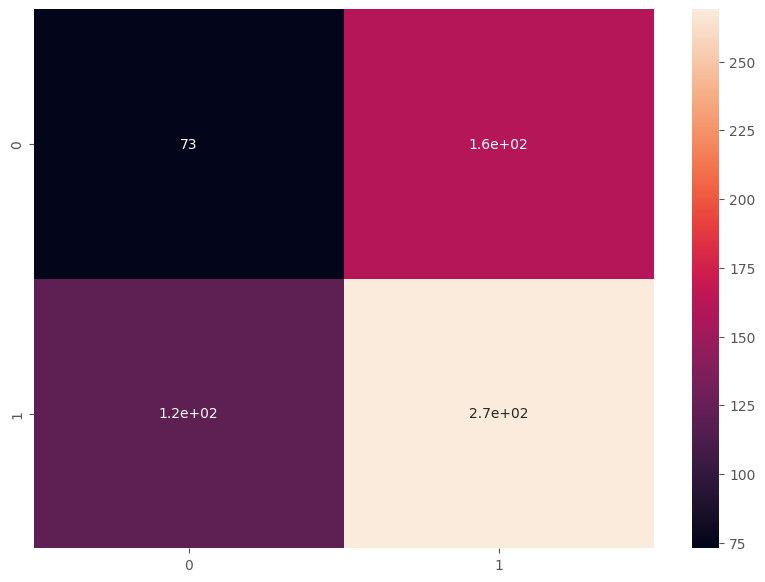

In [ ]:
# Create a confusion matrix
matrix = confusion_matrix(Test.classes, y_pred_binary)
plt.figure(figsize=(10, 7))
ax = plt.subplot()
sns.heatmap(matrix, annot=True, ax=ax)

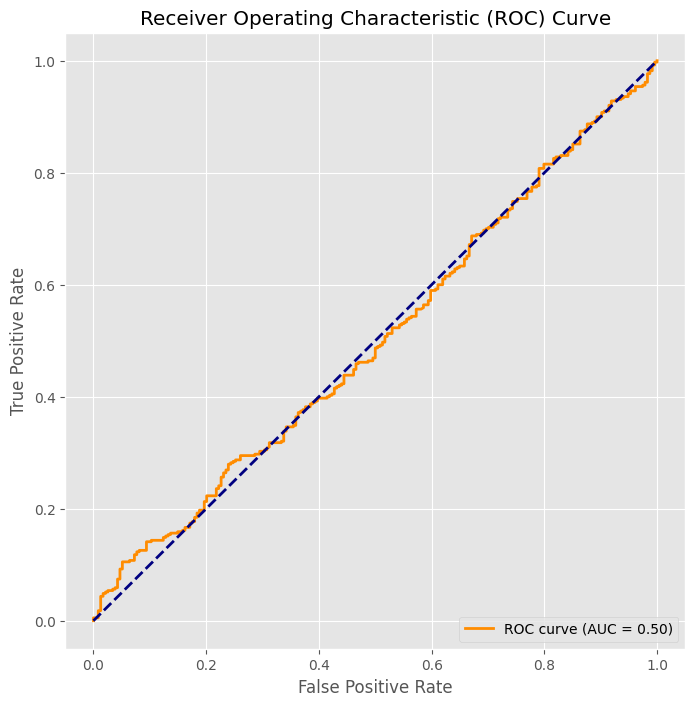

In [ ]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(Test.classes, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#**RESNET_50**

In [ ]:
# Define image dimensions
img_width_r, img_height_r = 224, 224
# Load pre-trained ResNet-50 model without top layers
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width_r, img_height_r, 3))
# Freeze the layers of the pre-trained model
for layer in resnet.layers:
    layer.trainable = False

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
# Add custom fully connected layers for binary classification
model_resnet = Sequential([
    resnet,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [ ]:
# Define callbacks
checkpoint_path = '/content/drive/MyDrive/model_checkpointresnet/resnet.h5'
checkpoint = ModelCheckpoint(filepath=checkpoint_path, mode='auto', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
#Compile the model
model_resnet.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
q = model_resnet.fit(Train, validation_data=Test, epochs=10,callbacks=[checkpoint, early_stopping])




Epoch 1/10
52/52 [==============================] - ETA: 0s - loss: 1.3797 - accuracy: 0.6217

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


52/52 [==============================] - 406s 8s/step - loss: 1.3797 - accuracy: 0.6217 - val_loss: 0.9029 - val_accuracy: 0.6266
Epoch 2/10
52/52 [==============================] - 338s 7s/step - loss: 0.4621 - accuracy: 0.7786 - val_loss: 0.4912 - val_accuracy: 0.7340
Epoch 3/10
52/52 [==============================] - 330s 6s/step - loss: 0.4142 - accuracy: 0.8120 - val_loss: 0.5987 - val_accuracy: 0.6747
Epoch 4/10
52/52 [==============================] - 396s 8s/step - loss: 0.4045 - accuracy: 0.8224 - val_loss: 0.4320 - val_accuracy: 0.7933
Epoch 5/10
52/52 [==============================] - 339s 6s/step - loss: 0.3551 - accuracy: 0.8339 - val_loss: 0.3977 - val_accuracy: 0.8317
Epoch 6/10
52/52 [==============================] - 328s 6s/step - loss: 0.3280 - accuracy: 0.8564 - val_loss: 0.4596 - val_accuracy: 0.7692
Epoch 7/10
52/52 [==============================] - 334s 6s/step - loss: 0.3277 - accuracy: 0.8528 - val_loss: 0.3681 - val_accuracy: 0.8510
Epoch 8/10
52/52 [======

In [ ]:
# Load the best model
model_resnet = load_model('/content/drive/MyDrive/model_checkpointresnet/resnet.h5')

# Evaluate the model on the test set
loss, accuracy = model_resnet.evaluate(Test)
print(f"Test accuracy: {accuracy * 100:.2f}%")

20/20 [==============================] - 88s 4s/step - loss: 0.3433 - accuracy: 0.8462
Test accuracy: 84.62%


In [ ]:
model_resnet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               12845184  
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 36433025 (138.98 MB)
Trainable params: 12845313 (49.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
# Load the best model
model_resnet = load_model('/content/drive/MyDrive/model_checkpointresnet/resnet.h5')


In [ ]:
# Predict on test set
y_pred = model_resnet.predict(Test)

20/20 [==============================] - 83s 4s/step


In [ ]:
# Convert probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

In [ ]:
# Calculate additional metrics
accuracy = accuracy_score(Test.classes, y_pred_binary)
precision = precision_score(Test.classes, y_pred_binary)
recall = recall_score(Test.classes, y_pred_binary)
auc_value = roc_auc_score(Test.classes, y_pred)

In [ ]:
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"AUC:{auc_value*100:.2f}%")

Accuracy: 54.49%
Precision: 64.89%
Recall: 59.23%
AUC:52.53%


<Axes: >

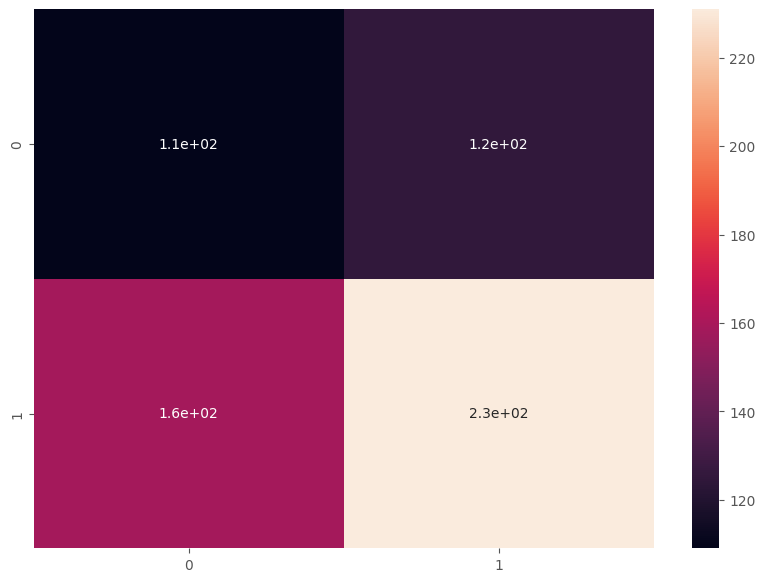

In [ ]:
# Create a confusion matrix
matrix = confusion_matrix(Test.classes, y_pred_binary)
plt.figure(figsize=(10, 7))
ax = plt.subplot()
sns.heatmap(matrix, annot=True, ax=ax)

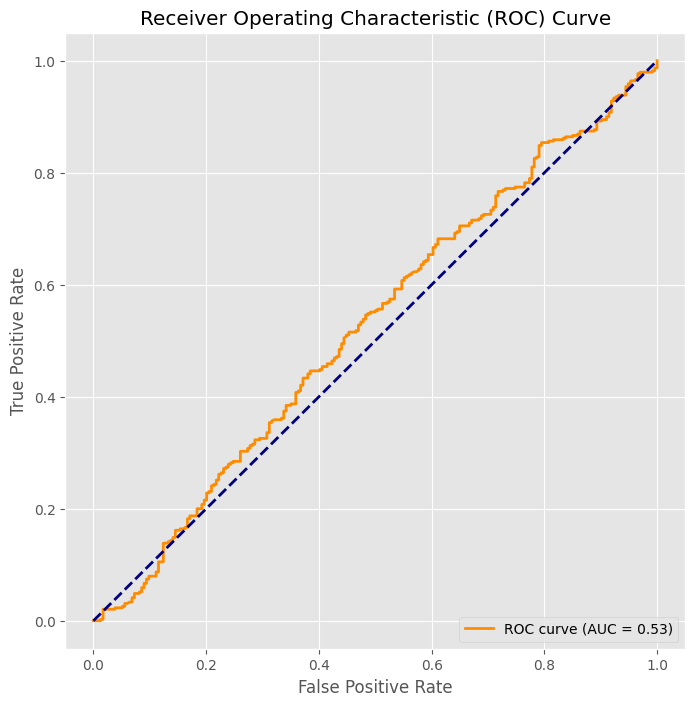

In [ ]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(Test.classes, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#**MobileNetV2**

In [ ]:
# Define image dimensions
img_width_m, img_height_m = 224, 224

# Load pre-trained MobileNetV2 model without top layers
mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width_m, img_height_m, 3))

# Freeze the layers of the pre-trained model
for layer in mobilenet.layers:
    layer.trainable = False

model_mobilenet = Sequential([
    mobilenet,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
# Define callbacks
checkpoint_path = '/content/drive/MyDrive/model_checkpointmobilenet/mobilenet.h5'
checkpoint = ModelCheckpoint(filepath=checkpoint_path, mode='auto', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
#Compile the model
model_mobilenet.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
e = model_mobilenet.fit(Train, validation_data=Test, epochs=10,callbacks=[checkpoint, early_stopping])

Epoch 1/10
52/52 [==============================] - ETA: 0s - loss: 1.7819 - accuracy: 0.8905

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


52/52 [==============================] - 117s 2s/step - loss: 1.7819 - accuracy: 0.8905 - val_loss: 0.4934 - val_accuracy: 0.9215
Epoch 2/10
52/52 [==============================] - 112s 2s/step - loss: 0.1786 - accuracy: 0.9617 - val_loss: 0.4124 - val_accuracy: 0.9071
Epoch 3/10
52/52 [==============================] - 115s 2s/step - loss: 0.2053 - accuracy: 0.9532 - val_loss: 1.3122 - val_accuracy: 0.8205
Epoch 4/10
52/52 [==============================] - 129s 2s/step - loss: 0.1372 - accuracy: 0.9599 - val_loss: 1.2648 - val_accuracy: 0.8429
Epoch 5/10
52/52 [==============================] - 114s 2s/step - loss: 0.1290 - accuracy: 0.9696 - val_loss: 0.4054 - val_accuracy: 0.9135
Epoch 6/10
52/52 [==============================] - 113s 2s/step - loss: 0.1159 - accuracy: 0.9738 - val_loss: 0.6917 - val_accuracy: 0.8878
Epoch 7/10
52/52 [==============================] - 115s 2s/step - loss: 0.0839 - accuracy: 0.9757 - val_loss: 1.3429 - val_accuracy: 0.8221
Epoch 8/10
52/52 [======

In [ ]:
# Load the best model
model_mobilenet = load_model('/content/drive/MyDrive/model_checkpointmobilenet/mobilenet.h5')

# Evaluate the model on the test set
loss, accuracy = model_mobilenet.evaluate(Test)
print(f"Test accuracy: {accuracy * 100:.2f}%")

20/20 [==============================] - 27s 1s/step - loss: 0.4054 - accuracy: 0.9135
Test accuracy: 91.35%


In [ ]:
model_mobilenet.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten_2 (Flatten)         (None, 62720)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               8028288   
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 10286401 (39.24 MB)
Trainable params: 8028417 (30.63 MB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
# Load the best model
model_mobilenet = load_model('/content/drive/MyDrive/model_checkpointmobilenet/mobilenet.h5')

In [ ]:
# Predict on test set
y_pred = model_mobilenet.predict(Test)

20/20 [==============================] - 31s 1s/step


In [ ]:
# Convert probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

In [ ]:
# Calculate additional metrics
accuracy = accuracy_score(Test.classes, y_pred_binary)
precision = precision_score(Test.classes, y_pred_binary)
recall = recall_score(Test.classes, y_pred_binary)
auc_value = roc_auc_score(Test.classes, y_pred)

In [ ]:
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"AUC:{auc_value*100:.2f}%")

Accuracy: 48.72%
Precision: 59.07%
Recall: 58.46%
AUC:47.35%


<Axes: >

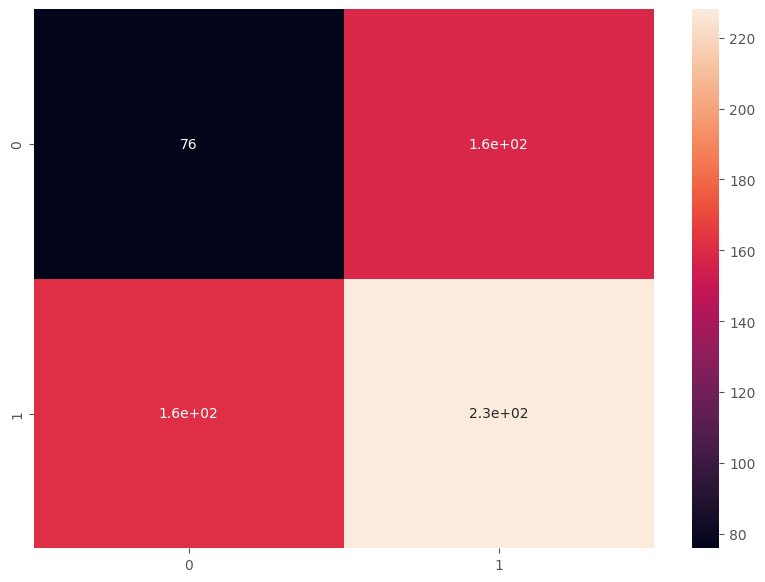

In [ ]:
# Create a confusion matrix
matrix = confusion_matrix(Test.classes, y_pred_binary)
plt.figure(figsize=(10, 7))
ax = plt.subplot()
sns.heatmap(matrix, annot=True, ax=ax)

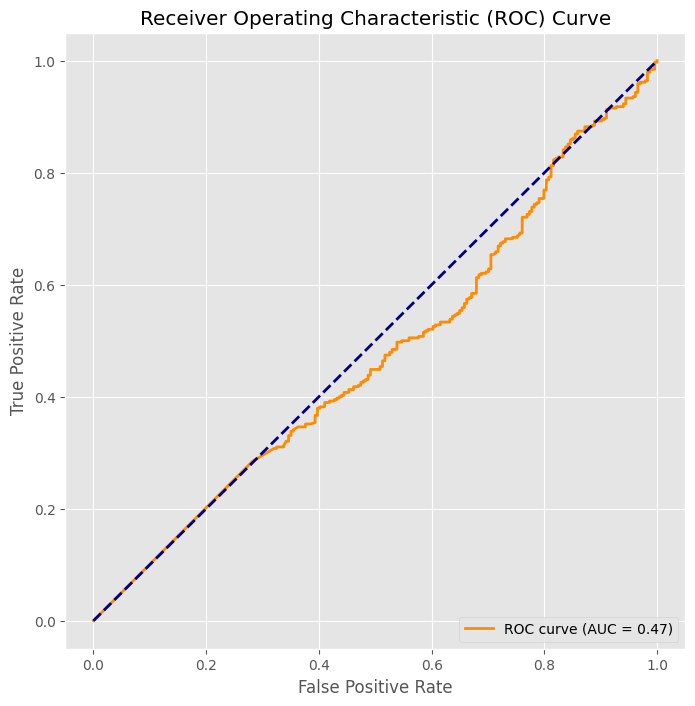

In [ ]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(Test.classes, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#**DenseNet121**

In [ ]:
# Define image dimensions
img_width_d, img_height_d = 224, 224

# Load pre-trained DenseNet121 model without top layers
densenet = DenseNet121(weights='imagenet', include_top=False, input_shape=(img_width_d, img_height_d, 3))

# Freeze the layers of the pre-trained model
for layer in densenet.layers:
    layer.trainable = False

# Adding Flatten layer instead of GlobalAveragePooling2D
model_densenet = Sequential([
    densenet,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
# Define callbacks
checkpoint_path_d = '/content/drive/MyDrive/model_checkpointdensenet/densenet.h5'
checkpoint_d = ModelCheckpoint(filepath=checkpoint_path_d, mode='auto', save_best_only=True)
early_stopping_d = EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
# Compile the model
model_densenet.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
e_d = model_densenet.fit(Train, validation_data=Test, epochs=10, callbacks=[checkpoint_d, early_stopping_d])

Epoch 1/10
52/52 [==============================] - ETA: 0s - loss: 1.3879 - accuracy: 0.8802

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


52/52 [==============================] - 307s 6s/step - loss: 1.3879 - accuracy: 0.8802 - val_loss: 3.1555 - val_accuracy: 0.8093
Epoch 2/10
52/52 [==============================] - 302s 6s/step - loss: 0.3518 - accuracy: 0.9556 - val_loss: 1.9109 - val_accuracy: 0.8686
Epoch 3/10
52/52 [==============================] - 309s 6s/step - loss: 0.3916 - accuracy: 0.9568 - val_loss: 1.8831 - val_accuracy: 0.8478
Epoch 4/10
52/52 [==============================] - 303s 6s/step - loss: 0.3559 - accuracy: 0.9465 - val_loss: 0.7653 - val_accuracy: 0.9183
Epoch 5/10
52/52 [==============================] - 300s 6s/step - loss: 0.1939 - accuracy: 0.9757 - val_loss: 1.7664 - val_accuracy: 0.8702
Epoch 6/10
52/52 [==============================] - 307s 6s/step - loss: 0.4158 - accuracy: 0.9562 - val_loss: 3.6491 - val_accuracy: 0.8013
Epoch 7/10
52/52 [==============================] - 300s 6s/step - loss: 0.2650 - accuracy: 0.9702 - val_loss: 5.0882 - val_accuracy: 0.7292


In [ ]:
# Load the best model
model_densenet = load_model('/content/drive/MyDrive/model_checkpointdensenet/densenet.h5')

In [ ]:
# Evaluate the model on the test set
loss_d, accuracy_d = model_densenet.evaluate(Test)
print(f"Test accuracy: {accuracy_d * 100:.2f}%")

20/20 [==============================] - 77s 4s/step - loss: 0.7653 - accuracy: 0.9183
Test accuracy: 91.83%


In [ ]:
model_densenet.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 flatten_3 (Flatten)         (None, 50176)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               6422656   
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 13460289 (51.35 MB)
Trainable params: 6422785 (24.50 MB)
Non-trainable params: 7037504 (26.85 MB)
_________________________________________________________________


In [ ]:
# Load the best model
model_densenet = load_model('/content/drive/MyDrive/model_checkpointdensenet/densenet.h5')

In [ ]:
# Predict on test set
y_pred_d = model_densenet.predict(Test)

# Convert probabilities to binary predictions
y_pred_binary_d = (y_pred_d > 0.5).astype(int)


20/20 [==============================] - 77s 4s/step


In [ ]:
# Calculate additional metrics
accuracy_d = accuracy_score(Test.classes, y_pred_binary_d)
precision_d = precision_score(Test.classes, y_pred_binary_d)
recall_d = recall_score(Test.classes, y_pred_binary_d)
auc_value = roc_auc_score(Test.classes, y_pred)

In [ ]:
print(f"Accuracy: {accuracy_d * 100:.2f}%")
print(f"Precision: {precision_d * 100:.2f}%")
print(f"Recall: {recall_d * 100:.2f}%")
print(f"AUC:{auc_value*100:.2f}%")

Accuracy: 54.17%
Precision: 62.87%
Recall: 65.13%
AUC:51.81%


<Axes: >

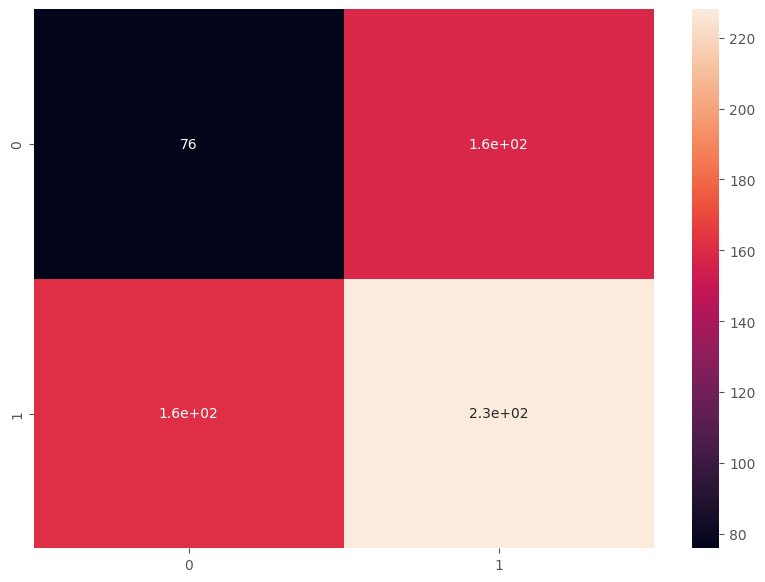

In [ ]:
# Create a confusion matrix
matrix = confusion_matrix(Test.classes, y_pred_binary)
plt.figure(figsize=(10, 7))
ax = plt.subplot()
sns.heatmap(matrix, annot=True, ax=ax)

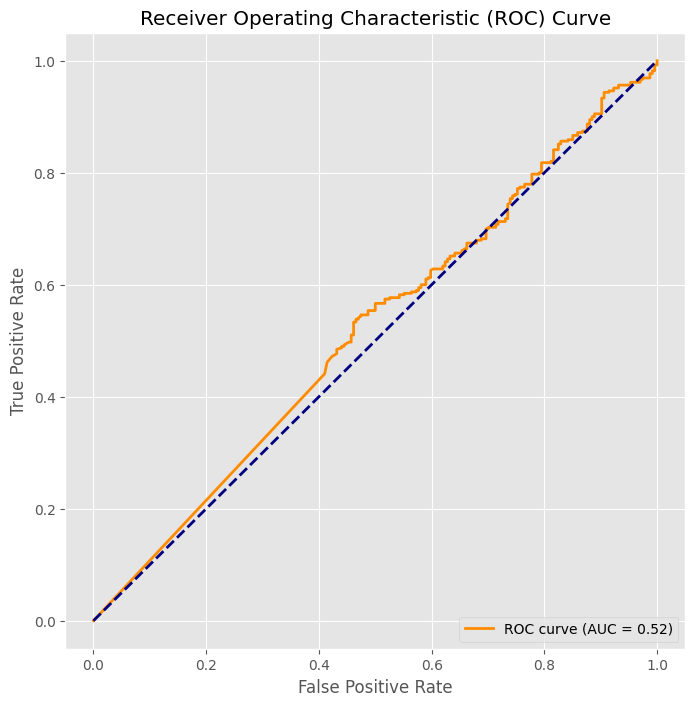

In [ ]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(Test.classes, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#**Stacked Model(vgg16&desnet121)**

In [ ]:
# Define input shape
input_shape = (224, 224, 3)
input_layer = Input(shape=input_shape)

In [ ]:
# Load pre-trained VGG16 and DenseNet121 models
base_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
base_densenet = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the layers of the pre-trained models
for layer in base_vgg16.layers:
    layer.trainable = False

for layer in base_densenet.layers:
    layer.trainable = False


In [ ]:
# Create models for each base model
model_vgg16 = base_vgg16(input_layer)
model_vgg16 = GlobalAveragePooling2D()(model_vgg16)
output_vgg16 = Flatten()(model_vgg16)

model_densenet = base_densenet(input_layer)
model_densenet = GlobalAveragePooling2D()(model_densenet)
output_densenet = Flatten()(model_densenet)


In [ ]:
# Concatenate features
merged = tf.keras.layers.Concatenate()([output_vgg16, output_densenet])

In [ ]:
# Additional layers
x = BatchNormalization()(merged)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(1, activation='sigmoid')(x)

In [ ]:
# Create the stacked model
stacked_model = Model(inputs=input_layer, outputs=output_layer)

In [ ]:
# Compile the stacked model
stacked_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks
checkpoint_path_stacked = '/content/drive/MyDrive/model_checkpoint_stacked/stacked_model.h5'
checkpoint_stacked = ModelCheckpoint(filepath=checkpoint_path_stacked, mode='auto', save_best_only=True)
early_stopping_stacked = EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
# Train the stacked model
history_stacked = stacked_model.fit(
    Train,
    validation_data=Test,
    epochs=10,
    callbacks=[checkpoint_stacked, early_stopping_stacked]
)

Epoch 1/10
52/52 [==============================] - ETA: 0s - loss: 0.2779 - accuracy: 0.8875 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


52/52 [==============================] - 1103s 21s/step - loss: 0.2779 - accuracy: 0.8875 - val_loss: 0.4127 - val_accuracy: 0.8253
Epoch 2/10
52/52 [==============================] - 1109s 21s/step - loss: 0.1550 - accuracy: 0.9453 - val_loss: 0.2795 - val_accuracy: 0.9038
Epoch 3/10
52/52 [==============================] - 1088s 21s/step - loss: 0.1608 - accuracy: 0.9398 - val_loss: 0.2656 - val_accuracy: 0.8974
Epoch 4/10
52/52 [==============================] - 1086s 21s/step - loss: 0.1244 - accuracy: 0.9562 - val_loss: 0.3332 - val_accuracy: 0.8670
Epoch 5/10
52/52 [==============================] - 1067s 21s/step - loss: 0.0862 - accuracy: 0.9653 - val_loss: 0.2955 - val_accuracy: 0.8990
Epoch 6/10
52/52 [==============================] - 1070s 21s/step - loss: 0.1109 - accuracy: 0.9568 - val_loss: 0.3054 - val_accuracy: 0.8974


In [ ]:
# Load the best model
stacked_model = load_model('/content/drive/MyDrive/model_checkpoint_stacked/stacked_model.h5')


In [ ]:
# Evaluate the stacked model on the test set
loss_stacked, accuracy_stacked = stacked_model.evaluate(Test)
print(f"Test accuracy: {accuracy_stacked * 100:.2f}%")

20/20 [==============================] - 289s 14s/step - loss: 0.2656 - accuracy: 0.8974
Test accuracy: 89.74%


In [ ]:
stacked_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, 7, 7, 512)            1471468   ['input_5[0][0]']             
                                                          8                                       
                                                                                                  
 densenet121 (Functional)    (None, 7, 7, 1024)           7037504   ['input_5[0][0]']             
                                                                                                  
 global_average_pooling2d (  (None, 512)                  0         ['vgg16[0][0]']           

In [ ]:
# Load the best model
stacked_model = load_model('/content/drive/MyDrive/model_checkpoint_stacked/stacked_model.h5')

# Evaluate the model on the test set
y_pred_stacked = stacked_model.predict(Test)
y_pred_binary_stacked = (y_pred_stacked > 0.5).astype(int)

20/20 [==============================] - 294s 15s/step


In [ ]:
accuracy_stacked = accuracy_score(Test.classes, y_pred_binary_stacked)
precision_stacked = precision_score(Test.classes, y_pred_binary_stacked)
recall_stacked = recall_score(Test.classes, y_pred_binary_stacked)
auc_value_stacked = roc_auc_score(Test.classes, y_pred_stacked)



In [ ]:
print(f"Accuracy: {accuracy_stacked * 100:.2f}%")
print(f"Precision: {precision_stacked * 100:.2f}%")
print(f"Recall: {recall_stacked * 100:.2f}%")
print(f"AUC: {auc_value_stacked * 100:.2f}%")

Accuracy: 55.13%
Precision: 62.56%
Recall: 70.26%
AUC: 48.50%


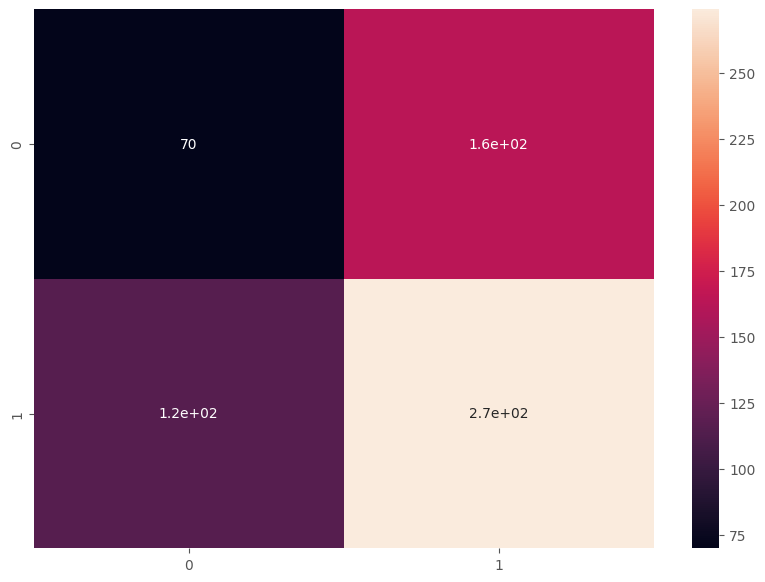

In [ ]:
# Create a confusion matrix
matrix_stacked = confusion_matrix(Test.classes, y_pred_binary_stacked)
plt.figure(figsize=(10, 7))
ax_stacked = plt.subplot()
sns.heatmap(matrix_stacked, annot=True, ax=ax_stacked)
plt.show()

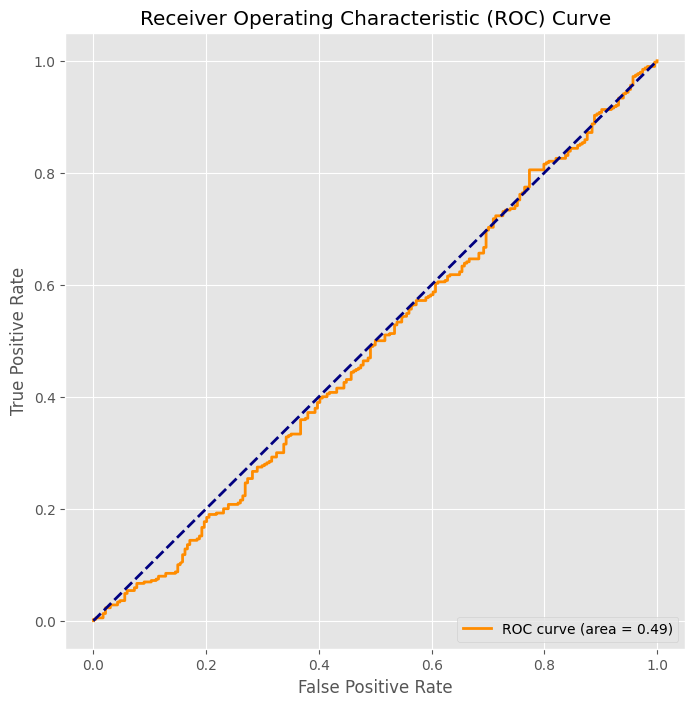

In [ ]:

fpr_stacked, tpr_stacked, _ = roc_curve(Test.classes, y_pred_stacked)
roc_auc_stacked = auc(fpr_stacked, tpr_stacked)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_stacked, tpr_stacked, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_stacked:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


#**stacked model DenseNet121 and ResNet50**

In [ ]:
# Define input shape
input_shape = (224, 224, 3)
input_layer = Input(shape=input_shape)

In [ ]:
# Load pre-trained DenseNet121 and ResNet50 models
base_densenet = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)
base_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
# Freeze the layers of the pre-trained models
for layer in base_densenet.layers:
    layer.trainable = False

for layer in base_resnet50.layers:
    layer.trainable = False


In [ ]:
# Create models for each base model
model_densenet = base_densenet(input_layer)
model_densenet = GlobalAveragePooling2D()(model_densenet)
output_densenet = Flatten()(model_densenet)

model_resnet50 = base_resnet50(input_layer)
model_resnet50 = GlobalAveragePooling2D()(model_resnet50)
output_resnet50 = Flatten()(model_resnet50)


In [ ]:
# Concatenate features
merged = tf.keras.layers.Concatenate()([output_densenet, output_resnet50])


In [ ]:
# Additional layers
x = BatchNormalization()(merged)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(1, activation='sigmoid')(x)

In [ ]:
# Create the stacked model
stacked_model = Model(inputs=input_layer, outputs=output_layer)

In [ ]:
# Compile the stacked model
stacked_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Define callbacks
checkpoint_path_stacked = '/content/drive/MyDrive/model_checkpoint_stacked2/stacked_model_densenet_resnet50.h5'
checkpoint_stacked = ModelCheckpoint(filepath=checkpoint_path_stacked, mode='auto', save_best_only=True)
early_stopping_stacked = EarlyStopping(monitor='val_loss', patience=3)


In [ ]:
# Train the stacked model
history_stacked = stacked_model.fit(
    Train,
    validation_data=Test,
    epochs=10,
    callbacks=[checkpoint_stacked, early_stopping_stacked]
)


Epoch 1/10
52/52 [==============================] - ETA: 0s - loss: 0.3535 - accuracy: 0.8504 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


52/52 [==============================] - 806s 15s/step - loss: 0.3535 - accuracy: 0.8504 - val_loss: 0.5599 - val_accuracy: 0.6955
Epoch 2/10
52/52 [==============================] - 727s 14s/step - loss: 0.1688 - accuracy: 0.9313 - val_loss: 0.3898 - val_accuracy: 0.8429
Epoch 3/10
52/52 [==============================] - 733s 14s/step - loss: 0.1307 - accuracy: 0.9513 - val_loss: 0.3367 - val_accuracy: 0.8638
Epoch 4/10
52/52 [==============================] - 734s 14s/step - loss: 0.1520 - accuracy: 0.9495 - val_loss: 0.4232 - val_accuracy: 0.8253
Epoch 5/10
52/52 [==============================] - 757s 15s/step - loss: 0.1192 - accuracy: 0.9568 - val_loss: 0.3564 - val_accuracy: 0.8718
Epoch 6/10
52/52 [==============================] - 751s 14s/step - loss: 0.1308 - accuracy: 0.9507 - val_loss: 0.3377 - val_accuracy: 0.8702


In [ ]:
# Load the best model
stacked_model = load_model('/content/drive/MyDrive/model_checkpoint_stacked2/stacked_model_densenet_resnet50.h5')

In [ ]:
# Evaluate the stacked model on the test set
loss_stacked, accuracy_stacked = stacked_model.evaluate(Test)
print(f"Test accuracy: {accuracy_stacked * 100:.2f}%")

20/20 [==============================] - 201s 10s/step - loss: 0.3367 - accuracy: 0.8638
Test accuracy: 86.38%


In [ ]:
stacked_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 densenet121 (Functional)    (None, 7, 7, 1024)           7037504   ['input_1[0][0]']             
                                                                                                  
 resnet50 (Functional)       (None, 7, 7, 2048)           2358771   ['input_1[0][0]']             
                                                          2                                       
                                                                                                  
 global_average_pooling2d (  (None, 1024)                 0         ['densenet121[0][0]']     

In [ ]:
# Load the best model
stacked_model = load_model('/content/drive/MyDrive/model_checkpoint_stacked2/stacked_model_densenet_resnet50.h5')

In [ ]:
# Evaluate the model on the test set
y_pred_stacked = stacked_model.predict(Test)
y_pred_binary_stacked = (y_pred_stacked > 0.5).astype(int)
accuracy_stacked = accuracy_score(Test.classes, y_pred_binary_stacked)
precision_stacked = precision_score(Test.classes, y_pred_binary_stacked)
recall_stacked = recall_score(Test.classes, y_pred_binary_stacked)
auc_value_stacked = roc_auc_score(Test.classes, y_pred_stacked)

20/20 [==============================] - 199s 10s/step


In [ ]:
print(f"Accuracy: {accuracy_stacked * 100:.2f}%")
print(f"Precision: {precision_stacked * 100:.2f}%")
print(f"Recall: {recall_stacked * 100:.2f}%")
print(f"AUC: {auc_value_stacked * 100:.2f}%")

Accuracy: 56.89%
Precision: 63.12%
Recall: 74.62%
AUC: 51.69%


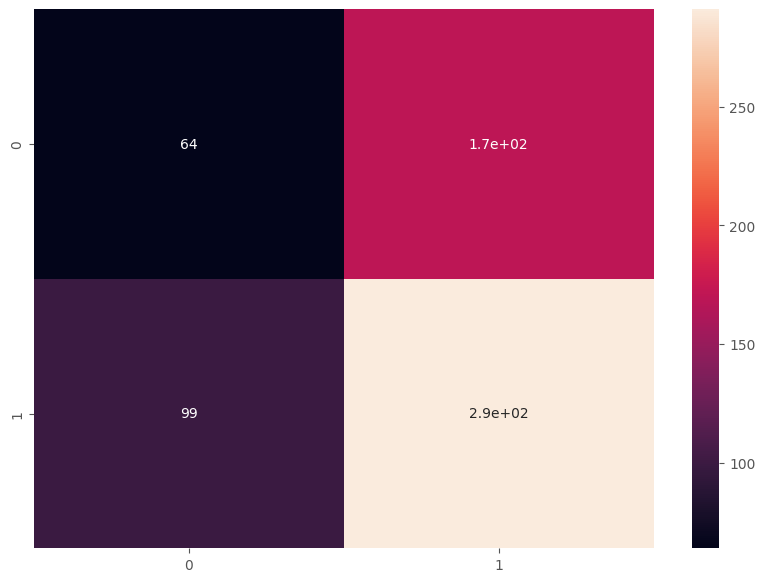

In [ ]:
# Create a confusion matrix
matrix_stacked = confusion_matrix(Test.classes, y_pred_binary_stacked)
plt.figure(figsize=(10, 7))
ax_stacked = plt.subplot()
sns.heatmap(matrix_stacked, annot=True, ax=ax_stacked)
plt.show()


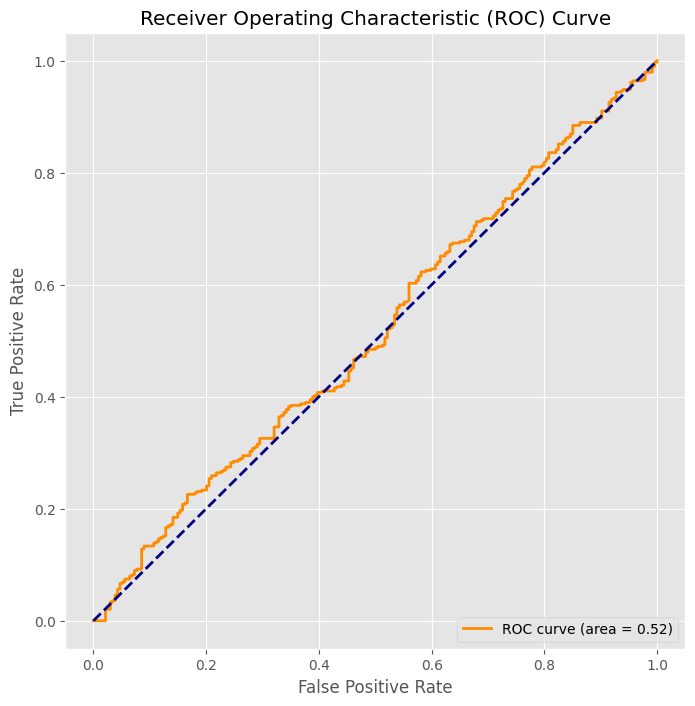

In [ ]:
fpr_stacked, tpr_stacked, _ = roc_curve(Test.classes, y_pred_stacked)
roc_auc_stacked = auc(fpr_stacked, tpr_stacked)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_stacked, tpr_stacked, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_stacked:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

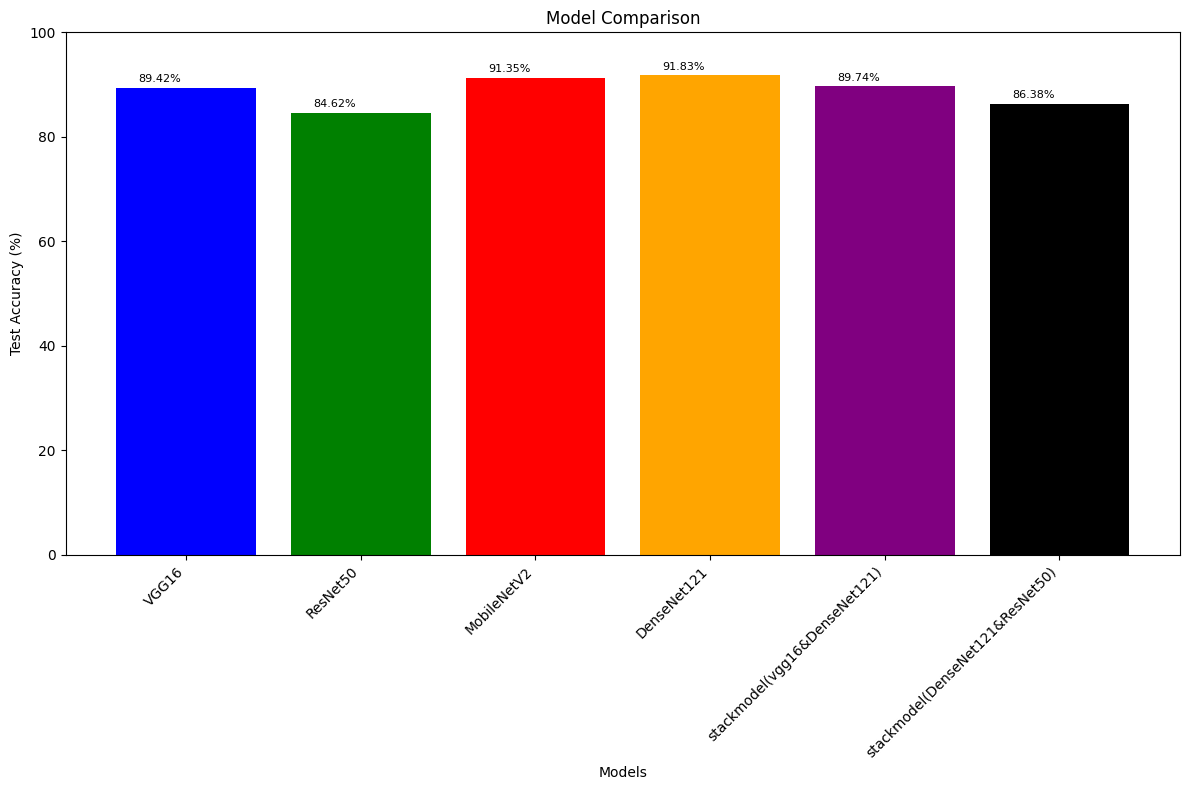

In [ ]:
models = ['VGG16', 'ResNet50', 'MobileNetV2', 'DenseNet121', 'stackmodel(vgg16&DenseNet121)', 'stackmodel(DenseNet121&ResNet50)']
test_accuracies = [89.42, 84.62, 91.35, 91.83, 89.74, 86.38]

# Create a bar chart
plt.figure(figsize=(12, 8))  # Increase the figure size
bars = plt.bar(models, test_accuracies, color=['blue', 'green', 'red', 'orange', 'purple', 'black'])

plt.xlabel('Models')
plt.ylabel('Test Accuracy (%)')
plt.title('Model Comparison')
plt.ylim(0, 100)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Add data labels
for bar, label in zip(bars, test_accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 1, f'{label:.2f}%', ha='center', color='black', fontsize=8)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


MobileNetV2: MobileNetV2 is designed to be lightweight and efficient, making it faster than the other models on the list. It's particularly well-suited for mobile and edge devices.

VGG16: VGG16 has a relatively simple and uniform architecture compared to more recent models, but it has a larger number of parameters than MobileNetV2. It's generally faster than deeper architectures like ResNet50 or DenseNet121.

DenseNet121: DenseNet models, including DenseNet121, have a unique architecture that encourages feature reuse. They are more parameter-efficient than VGG-style networks but may be slower to compute due to their denser connectivity.

ResNet50: ResNet50 is a deeper architecture that introduced the concept of residual connections, allowing for the training of very deep networks. It has more parameters than VGG16 and may require more computation time.

Stacked Model(vgg16&desnet121):Pros: Stacked VGG16 and DenseNet121 model offers enhanced performance and feature extraction by combining the strengths of both architectures.

Cons: Increased complexity, potential for overfitting, and reduced interpretability are drawbacks associated with the stacked model, necessitating careful consideration of trade-offs.
stacked model DenseNet121 and ResNet50

| Model                           | Test Accuracy | Accuracy | Precision | Recall | AUC   |
|---------------------------------|---------------|----------|-----------|--------|-------|
| VGG16                           | 89.42         | 54.81    | 62.56     | 68.97  | 50.14 |
| RESNET_50                       | 84.62         | 54.49    | 64.89     | 59.23  | 52.53 |
| MobileNetV2                     | 91.35         | 48.72    | 59.07     | 58.46  | 47.35 |
| DenseNet121                     | 91.83         | 54.17    | 62.87     | 65.13  | 51.81 |
| Stacked Model(vgg16&desnet121)  | 89.74         | 55.13    | 62.56     | 70.26  | 48.50 |
| Stacked Model(DenseNet121&ResNet50) | 86.38   | 56.89    | 63.12     | 74.62  | 51.69 |


Based on the above table, DenseNet121 achieved the highest test accuracy of 91.83%. It also has a good balance of precision, recall, and AUC. Therefore, DenseNet121 is the best performing model among the six models.

Here is a summary of the pros and cons of each model:

VGG16: Pros: High test accuracy, good precision. Cons: Low recall, low AUC.
RESNET_50: Pros: Good precision, good AUC. Cons: Low test accuracy, low recall.
MobileNetV2: Pros: High test accuracy. Cons: Low accuracy, low precision, low recall, low AUC.
DenseNet121: Pros: High test accuracy, good balance of precision, recall, and AUC. Cons: None.
Stacked Model(vgg16&desnet121): Pros: High test accuracy, good recall. Cons: Low accuracy, low precision, low AUC.
stacked model DenseNet121 and ResNet50: Pros: Good test accuracy, high recall. Cons: Low accuracy, low precision, low AUC.